<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/Sympy_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thoughts on Making Numerical Object Oriented

## Nicholas Jacob

To make the code object oriented, we could build our own classes.  Instead, I think I am going to use `sympy` and build it from that base.  This would allow me to do some object oriented ideas while not building everything from new. 

In [1]:
from sympy import *
x = Symbol('x')

In this vein, I think I'll try to rework the first project.  I'll make a Taylor series expansion of the function $f(x) = e^{-x^2}$ centered at $x = 1$.  This is the Guassian function and I am centering it at the standard deviation.

In [5]:
f = E**(-x**2)
f

exp(-x**2)

The notation for using `sympy` is a bit strange.  If I want to plug in a value, I need to say what variable I am `subs`tituing.

In [6]:
f.subs(x,1)

exp(-1)

For the Talyor series expansion, I need derivatives.  Below is the first derivative.

In [8]:
f.diff(x,1)

-2*x*exp(-x**2)

I can chain that together with `subs`

In [21]:
f.diff((x,1)).subs(x,1)

-2*exp(-1)

I think I am ready to put it all together into the level for each iteration of the series.

In [17]:
n = symbols('n')

g = (x-1)**n


In [18]:
g

(x - 1)**n

In [23]:
taylorterm = g*f.diff((x,n)).subs(x,1)

In [24]:
taylorterm

(x - 1)**n*Subs(Derivative(exp(-x**2), (x, n)), x, 1)

You should note that the `taylorterm` has two variables, $x$ and $n$.  You'll need both to do any evaluations.

In [28]:
taylor20 = Sum(taylorterm, (n,0,20)).doit()

taylor20

1107214478336*(x - 1)**20*exp(-1) - 11377556480*(x - 1)**19*exp(-1) - 28538404352*(x - 1)**18*exp(-1) + 1901510144*(x - 1)**17*exp(-1) + 727511296*(x - 1)**16*exp(-1) - 104891648*(x - 1)**15*exp(-1) - 17257600*(x - 1)**14*exp(-1) + 4978816*(x - 1)**13*exp(-1) + 280768*(x - 1)**12*exp(-1) - 230848*(x - 1)**11*exp(-1) + 8224*(x - 1)**10*exp(-1) + 10720*(x - 1)**9*exp(-1) - 1648*(x - 1)**8*exp(-1) - 464*(x - 1)**7*exp(-1) + 184*(x - 1)**6*exp(-1) + 8*(x - 1)**5*exp(-1) - 20*(x - 1)**4*exp(-1) + 4*(x - 1)**3*exp(-1) + 2*(x - 1)**2*exp(-1) - 2*(x - 1)*exp(-1) + exp(-1)

A few things to notice, sum is capitalized, the `doit()` was added to force the evlatuation.  Sympy prefferes not to work very had and leave things symbolically if possible.

Let's compare a few values.

In [36]:
N(taylor20.subs(x,1))

0.367879441171442

In [38]:
N(f.subs(x,1))

0.367879441171442

Of course these two values are the same, this is where we centered the expansion.  What about as we get further away?

In [39]:
N(taylor20.subs(x,1.1))

0.302474496814875

In [40]:
N(f.subs(x,1.1))

0.298197279429887

Not great.  Let's look to some graphs!  I centered the graph at the center of the taylor expansion.

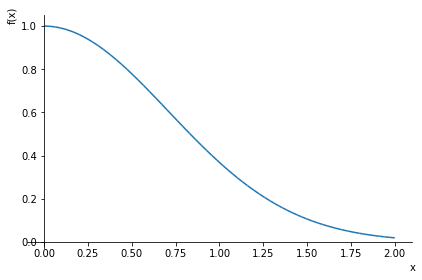

In [70]:
p1 = plot(f,(x,0,2))

p1

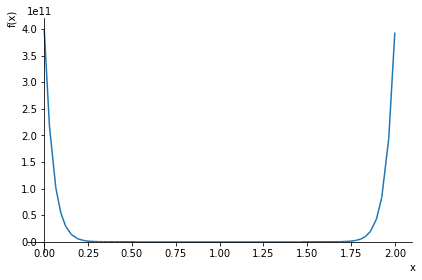

In [71]:
p2 = plot(taylor20,(x,0,2))

p2

In [73]:
p1.extend(p2)

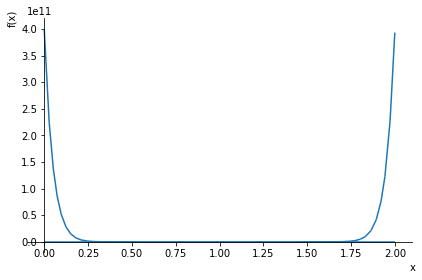

In [74]:
p1.show()

So that did not really show what was going on!  I am going to narrow the window to see how this actually works together!

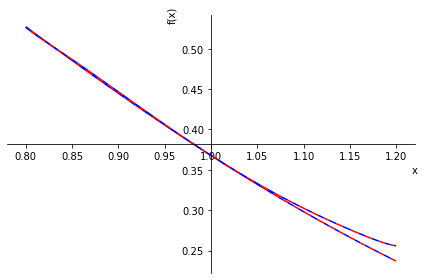

In [75]:
plot(f, taylor20,(x,.8,1.2), line_color = ('b','r'))


I played with the window a while here until I got a picture that I liked.  Clearly this is not the correct way to set the colors either!